*Eduardus Tjitrahardja | @edutjie | 2022*

# Random Forest

## Import Libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [20]:
plt.style.use('seaborn')

## Load Dataset

In [21]:
banking = pd.read_csv('../data/banking.csv')
banking.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [22]:
banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

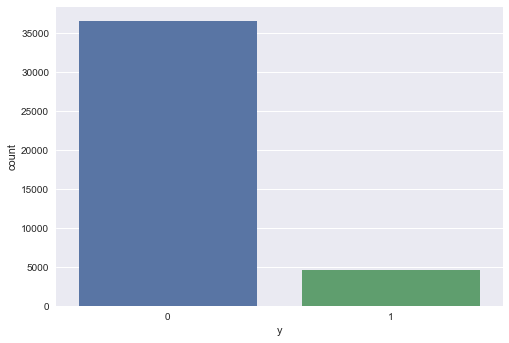

In [23]:
sns.countplot(x='y', data=banking)
plt.show()

In [24]:
banking.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [25]:
banking.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
basic.4y,47.596504,264.827826,2.600575,965.704981,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880,0.102490
basic.6y,40.448953,264.414485,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063,0.082024
basic.9y,39.061208,261.291811,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012,0.078246
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


## Data Preprocessing

In [26]:
cat_cols = banking.select_dtypes(include=['object']).columns.to_list()
print(cat_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [27]:
for col in cat_cols:
    dummies = pd.get_dummies(banking[col], prefix=col)
    banking = pd.concat([banking, dummies], axis=1)
    banking.drop([col], axis=1, inplace=True)
banking.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1


In [29]:
print(banking.columns.to_list())

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_no', 'default_unknown', 'default_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',

## Prepare data for modeling

In [31]:
X = banking.drop(['y'], axis=1)
y = banking['y']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Train Data

In [33]:
rf_clf = RandomForestClassifier(random_state=101)

In [34]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=101)

In [36]:
model_score = rf_clf.score(X_test, y_test)
model_score

0.9147042162337137

## Evaluate Model

In [37]:
importances = rf_clf.feature_importances_
indices = np.argsort(importances)

importances, indices

(array([7.95960551e-02, 2.77381475e-01, 3.87788314e-02, 2.87979583e-02,
        1.25213437e-02, 2.90830188e-02, 1.95401215e-02, 2.74958748e-02,
        9.75530130e-02, 4.35079786e-02, 1.21414189e-02, 8.11560092e-03,
        3.93108134e-03, 3.10620253e-03, 6.81753918e-03, 5.35567974e-03,
        4.06367529e-03, 6.32893295e-03, 4.37014996e-03, 9.59025386e-03,
        3.87240763e-03, 1.92272412e-03, 7.18214511e-03, 1.17285355e-02,
        1.06513698e-02, 6.43921763e-04, 6.44476850e-03, 4.24727476e-03,
        8.08416636e-03, 1.05599762e-02, 2.41135898e-04, 8.35859997e-03,
        1.20273066e-02, 4.74641436e-03, 5.09285057e-03, 5.26760805e-03,
        0.00000000e+00, 1.30715866e-02, 1.78149270e-03, 1.30906880e-02,
        9.09207683e-03, 1.76270314e-03, 8.88386601e-03, 6.46500746e-03,
        7.42320056e-03, 3.58592097e-03, 2.88251737e-03, 7.68195736e-04,
        2.74553943e-03, 2.82825097e-03, 5.12621077e-03, 5.14337589e-03,
        2.70333940e-03, 5.09061097e-03, 2.49304543e-03, 1.024341

In [38]:
features_importance = pd.DataFrame(importances, columns=['importance'], index=X_train.columns)
features_importance.head()

,importance
age,0.079596
duration,0.277381
campaign,0.038779
pdays,0.028798
previous,0.012521


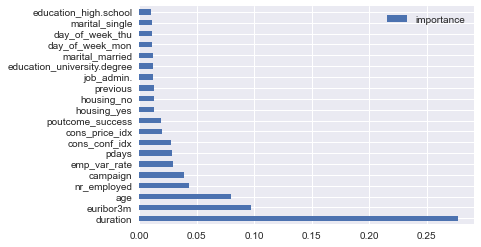

In [54]:
features_importance.nlargest(20, "importance").plot(kind="barh")
plt.show()

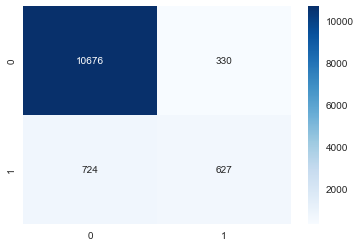

In [53]:
sns.heatmap(confusion_matrix(y_test, rf_clf.predict(X_test)), annot=True, cmap="Blues", fmt='d')
plt.show()

In [47]:
print(classification_report(y_test, rf_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     11006
           1       0.66      0.46      0.54      1351

    accuracy                           0.91     12357
   macro avg       0.80      0.72      0.75     12357
weighted avg       0.91      0.91      0.91     12357

